In [1]:
import numpy as np
import pandas as pd
import os, sys

# Append directory path
sys.path.append(os.path.abspath('../../'))

In [2]:
from neuralnetwork import NeuralNetwork

In [3]:
# Getting the data from .txt file and shuffle it
df = pd.read_csv('iris.txt', sep=',', header=None)
df.columns = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
# Creating an one-dimension vector, each element corresponds to a flower specie
def one_hot(arr):
    temp = np.zeros((len(arr), 3)) 
    for i in range(len(arr)):
        if arr[i] == 'Iris-versicolor':
            temp[i][0] = 1.0
        elif arr[i] == 'Iris-setosa':
            temp[i][1] = 1.0
        elif arr[i] == 'Iris-virginica':
            temp[i][2] = 1.0
    return temp

In [5]:
# Separate data into trainable and testable
test_labels = np.array(df['class'][:6])
test_data = np.array(df.loc[:5, df.columns!='class'])

train_labels = one_hot(np.array(df['class'][5:]))
train_data = np.array(df.loc[5:, df.columns!='class'])

In [6]:
# Reshape inputs in order to fit to the network
train_data = train_data.reshape(145, 4, 1)
test_data = test_data.reshape(6, 4, 1)

In [7]:
# Initializing the network's parameters
nn = NeuralNetwork([
    {'input_size': 4, 'neurons_size': 16, 'activation': 'relu'},
    {'input_size': 16, 'neurons_size': 3, 'activation': 'softmax'},
])

Epoch: #1/50 
 Loss: [2.95743529]
Epoch: #2/50 
 Loss: [0.6694267]
Epoch: #3/50 
 Loss: [0.54704788]
Epoch: #4/50 
 Loss: [0.45748764]
Epoch: #5/50 
 Loss: [0.39410366]
Epoch: #6/50 
 Loss: [0.34070259]
Epoch: #7/50 
 Loss: [0.3029902]
Epoch: #8/50 
 Loss: [0.27175737]
Epoch: #9/50 
 Loss: [0.24555165]
Epoch: #10/50 
 Loss: [0.22578988]
Epoch: #11/50 
 Loss: [0.2091673]
Epoch: #12/50 
 Loss: [0.19531123]
Epoch: #13/50 
 Loss: [0.1836352]
Epoch: #14/50 
 Loss: [0.17368289]
Epoch: #15/50 
 Loss: [0.16508125]
Epoch: #16/50 
 Loss: [0.15757008]
Epoch: #17/50 
 Loss: [0.15094802]
Epoch: #18/50 
 Loss: [0.14513067]
Epoch: #19/50 
 Loss: [0.13983736]
Epoch: #20/50 
 Loss: [0.13517155]
Epoch: #21/50 
 Loss: [0.13091637]
Epoch: #22/50 
 Loss: [0.12705929]
Epoch: #23/50 
 Loss: [0.12350443]
Epoch: #24/50 
 Loss: [0.12022395]
Epoch: #25/50 
 Loss: [0.11719998]
Epoch: #26/50 
 Loss: [0.1143917]
Epoch: #27/50 
 Loss: [0.11177376]
Epoch: #28/50 
 Loss: [0.10932539]
Epoch: #29/50 
 Loss: [0.10702886]

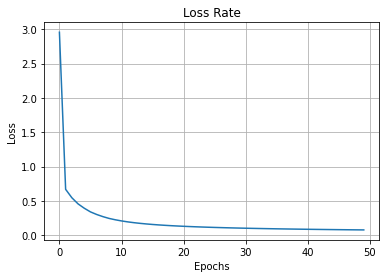

In [8]:
# Backpropagating
nn.back_prop(
    X=train_data,
    Y=train_labels,
    epochs=50,
    learn_rate=0.01,
    loss_func='CrossEntropyLoss'
)

In [10]:
# Testing
for i, input in enumerate(test_data):
    print(f'--------- Sample {i+1}/6 ---------')
    
    pred = np.argmax(nn.forward_propagation(input))
    
    if pred == 0:
        print('Prediction: Iris-versicolor')
    elif pred == 1:
        print('Prediction: Iris-setosa')
    elif pred == 2:
        print('Prediction: Iris-virginica')

    print(f'Correct label: {test_labels[i]}')

--------- Sample 1/6 ---------
Prediction: Iris-versicolor
Correct label: Iris-versicolor
--------- Sample 2/6 ---------
Prediction: Iris-versicolor
Correct label: Iris-versicolor
--------- Sample 3/6 ---------
Prediction: Iris-virginica
Correct label: Iris-versicolor
--------- Sample 4/6 ---------
Prediction: Iris-virginica
Correct label: Iris-virginica
--------- Sample 5/6 ---------
Prediction: Iris-virginica
Correct label: Iris-virginica
--------- Sample 6/6 ---------
Prediction: Iris-versicolor
Correct label: Iris-versicolor


In [7]:
# Save the parameters of the trained network
nn.save('model')

Model Saved
